In [82]:
import numpy as np
import cv2 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


d:\OneDrive\School\SMU\Modules\CS604_DL_for_Visual_Recognition\Project\diving-autotrim\venv\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [211]:
def plot_rgb_hist(img):

    red_hist = cv2.calcHist([img], [0], None, [256], [0, 255])
    green_hist = cv2.calcHist([img], [1], None, [256], [0, 255])
    blue_hist = cv2.calcHist([img], [2], None, [256], [0, 255])

    plt.plot(red_hist, color='red')
    plt.plot(green_hist, color='green')
    plt.plot(blue_hist, color='blue')

In [164]:
img = cv2.imread("../data/extracted_frames/GOPR0318.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img1 = cv2.imread("../data/extracted_frames/GOPR0374.jpg")
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

In [73]:
red_filter  = np.full(img.shape, (0,0,-255), img.dtype)
red_filter.shape

(3000, 4000, 3)

In [80]:
img_filtered = cv2.addWeighted(img, 0.5, red_filter, 0.5, 0)

In [77]:
img_filtered = cv2.add(img, red_filter)

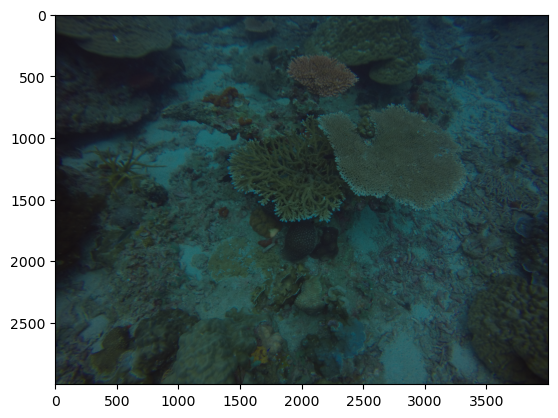

In [81]:
plt.imshow(img_filtered)

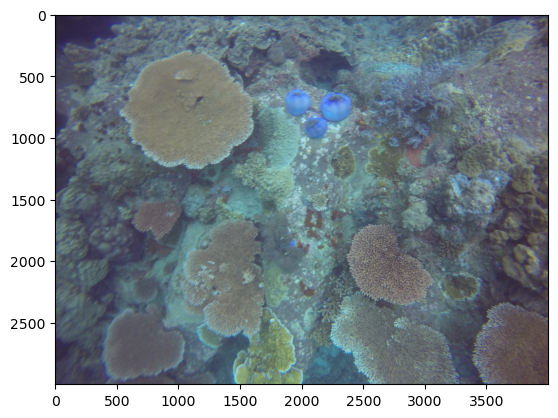

In [165]:
plt.imshow(img1)

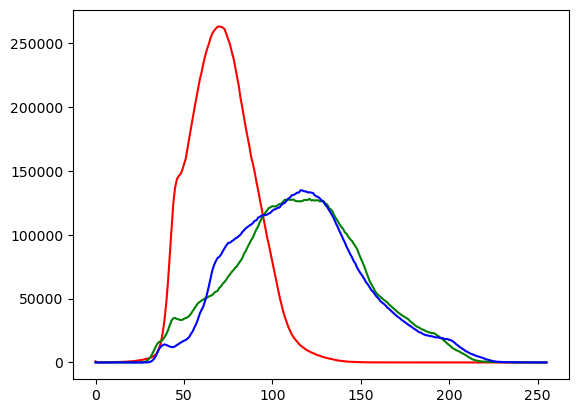

In [212]:
plot_rgb_hist(img)

In [84]:
range(img.shape[-1])

range(0, 3)

In [85]:
scaler = StandardScaler()
img_scaled = img.copy()
scalers = {}
for i in range(img.shape[-1]):
    scalers[i] = StandardScaler()
    img_scaled[:,:,i] = scalers[i].fit_transform(img[:,:,i]) 


In [184]:
img_scaled = img.copy()
img_scaled[:,:,0] = img_scaled[:,:,0] * 1.4
# img_scaled[:,:,2] = img_scaled[:,:,2] * 0.7
# img_scaled[:,:,1] = img_scaled[:,:,1] * 0.7

img_scaled = img1.copy()
img_scaled[:,:,0] = img_scaled[:,:,0] * 1.2

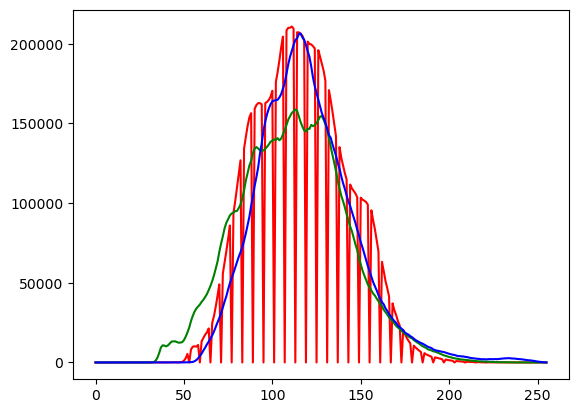

In [213]:
plot_rgb_hist(img_scaled)

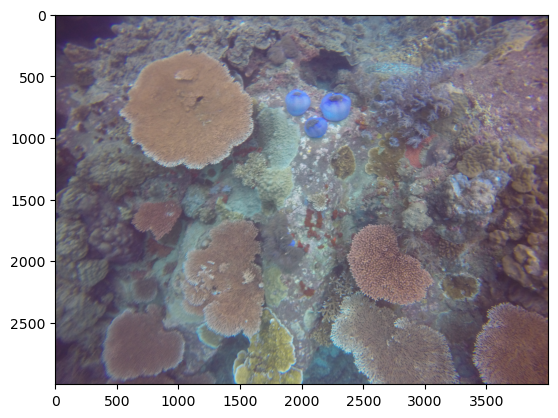

In [186]:
plt.imshow(img_scaled)

In [163]:
hsvImg.shape

(3000, 4000, 3)

In [189]:
hsvImg = cv2.cvtColor(img_scaled, cv2.COLOR_RGB2HSV)

#multiple by a factor to change the saturation
hsvImg[...,1] = hsvImg[...,1]*1.2



#multiple by a factor of less than 1 to reduce the brightness 
# hsvImg[...,2] = hsvImg[...,2]*1.1

image=cv2.cvtColor(hsvImg,cv2.COLOR_HSV2RGB)

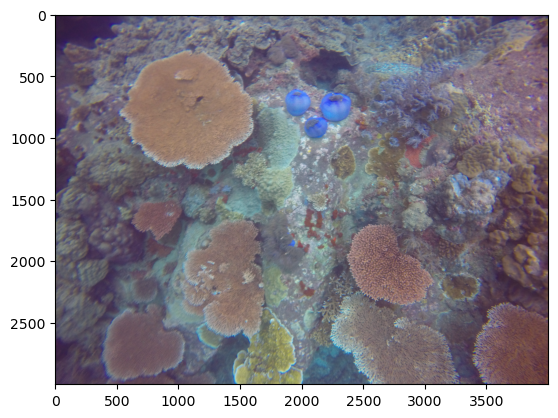

In [190]:
plt.imshow(image)

In [194]:
def automatic_brightness_and_contrast(image, clip_hist_percent=1):
    # https://stackoverflow.com/questions/56905592/automatic-contrast-and-brightness-adjustment-of-a-color-photo-of-a-sheet-of-pape/56909036

    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    
    # Calculate grayscale histogram
    hist = cv2.calcHist([gray],[0],None,[256],[0,256])
    hist_size = len(hist)
    
    # Calculate cumulative distribution from the histogram
    accumulator = []
    accumulator.append(float(hist[0]))
    for index in range(1, hist_size):
        accumulator.append(accumulator[index -1] + float(hist[index]))
    
    # Locate points to clip
    maximum = accumulator[-1]
    clip_hist_percent *= (maximum/100.0)
    clip_hist_percent /= 2.0
    
    # Locate left cut
    minimum_gray = 0
    while accumulator[minimum_gray] < clip_hist_percent:
        minimum_gray += 1
    
    # Locate right cut
    maximum_gray = hist_size -1
    while accumulator[maximum_gray] >= (maximum - clip_hist_percent):
        maximum_gray -= 1
    
    # Calculate alpha and beta values
    alpha = 255 / (maximum_gray - minimum_gray)
    beta = -minimum_gray * alpha
    
    '''
    # Calculate new histogram with desired range and show histogram 
    new_hist = cv2.calcHist([gray],[0],None,[256],[minimum_gray,maximum_gray])
    plt.plot(hist)
    plt.plot(new_hist)
    plt.xlim([0,256])
    plt.show()
    '''

    auto_result = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)
    return (auto_result, alpha, beta)

In [195]:
img_contast, __, __ = automatic_brightness_and_contrast(image)

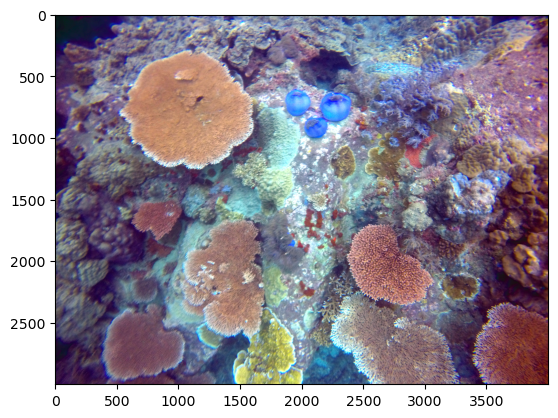

In [196]:
plt.imshow(img_contast)

In [197]:
def white_balance(img):
    result = cv2.cvtColor(img, cv2.COLOR_RGB2LAB)
    avg_a = np.average(result[:, :, 1])
    avg_b = np.average(result[:, :, 2])
    result[:, :, 1] = result[:, :, 1] - ((avg_a - 128) * (result[:, :, 0] / 255.0) * 1.1)
    result[:, :, 2] = result[:, :, 2] - ((avg_b - 128) * (result[:, :, 0] / 255.0) * 1.1)
    result = cv2.cvtColor(result, cv2.COLOR_LAB2RGB)
    return result

In [206]:
img_wb = white_balance(img)

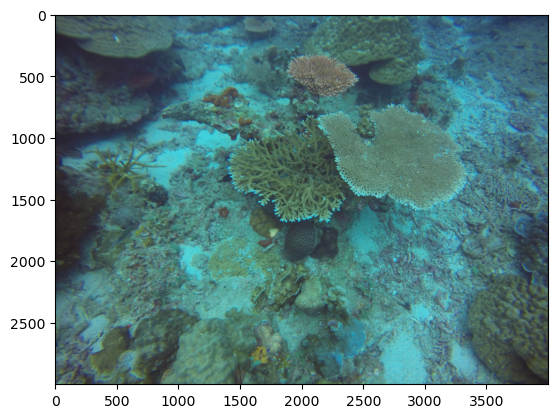

In [207]:
plt.imshow(img)

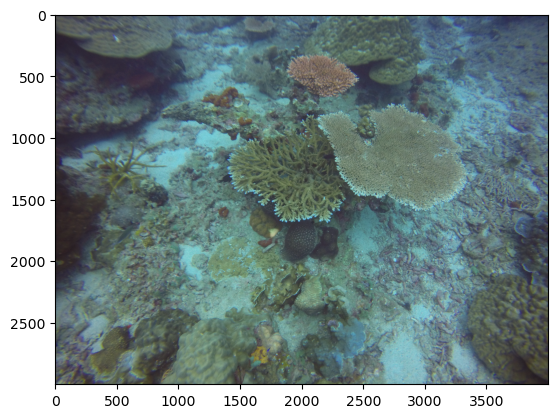

In [208]:
plt.imshow(img_wb)

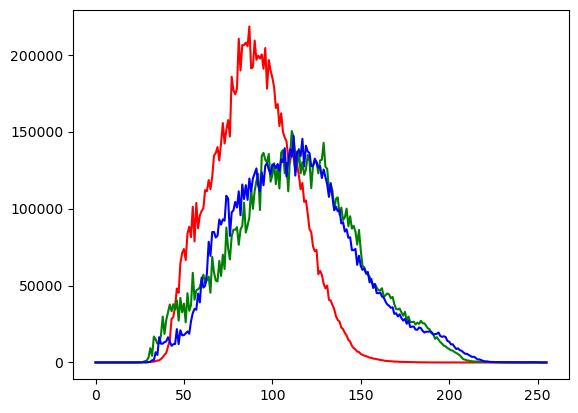

In [214]:
plot_rgb_hist(img_wb)

In [215]:
wb = cv2.xphoto.createGrayworldWB()
wb.setSaturationThreshold(0.99)
tmp = wb.balanceWhite(img)

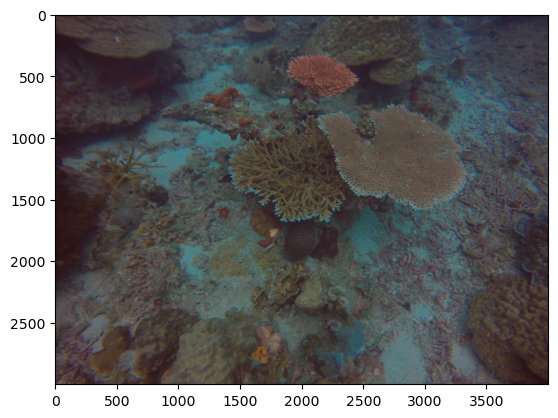

In [216]:
plt.imshow(tmp)

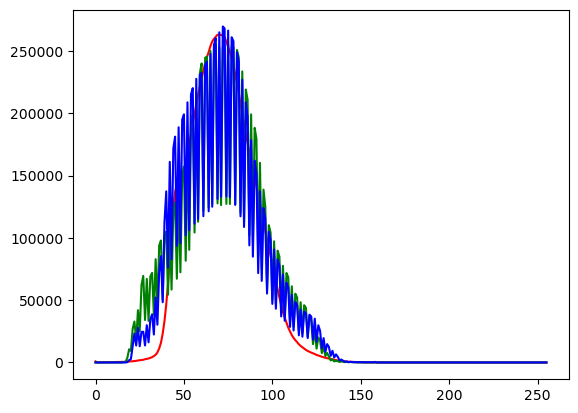

In [217]:
plot_rgb_hist(tmp)

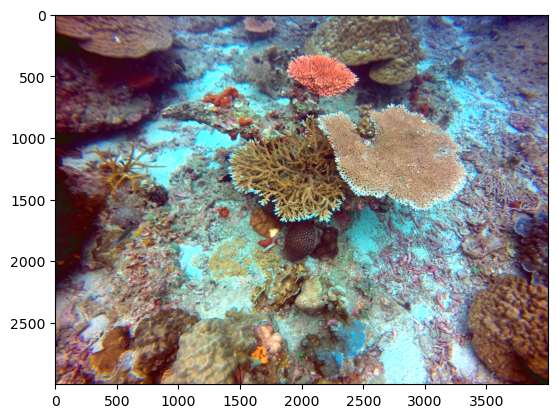

In [219]:
tmp_contast, __, __ = automatic_brightness_and_contrast(tmp)
plt.imshow(tmp_contast)

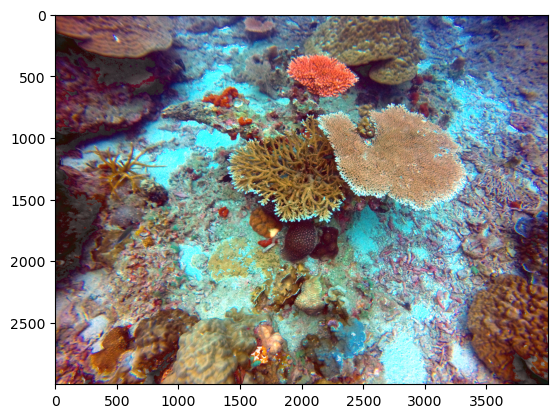

In [221]:
hsvImg = cv2.cvtColor(tmp_contast, cv2.COLOR_RGB2HSV)

#multiple by a factor to change the saturation
hsvImg[...,1] = hsvImg[...,1]*1.2



#multiple by a factor of less than 1 to reduce the brightness 
# hsvImg[...,2] = hsvImg[...,2]*1.1

image=cv2.cvtColor(hsvImg,cv2.COLOR_HSV2RGB)
plt.imshow(image)

In [24]:
def simplest_cb(img, percent):
    out_channels = []
    channels = cv2.split(img)
    totalstop = channels[0].shape[0] * channels[0].shape[1] * percent / 200.0
    for channel in channels:
        bc = cv2.calcHist([channel], [0], None, [256], (0,256), accumulate=False)
        lv = np.searchsorted(np.cumsum(bc), totalstop)
        hv = 255-np.searchsorted(np.cumsum(bc[::-1]), totalstop)
        lut = np.array([0 if i < lv else (255 if i > hv else round(float(i-lv)/float(hv-lv)*255)) for i in np.arange(0, 256)], dtype="uint8")
        out_channels.append(cv2.LUT(channel, lut))
    return cv2.merge(out_channels)

In [25]:
tmp = simplest_cb(img, 100)

ZeroDivisionError: float division by zero

In [13]:
( (1*1/3) + (1*2/3) + (2/3*2/3) + (0.5*2/3) + 0.6)/5

0.6755555555555557

In [19]:
(1+1+(2/3)+0.5+(3/5))/5

0.7533333333333333